## CO2 Density and Viscosity Correlation
Fitted by M. Burgoyne (Nov 2023) to NIST pure CO2 data over the range 0 - 300 degF and 14.7 - 15,000 psia

Currently unpublished - Unsure of value, since it's become sufficiently complex that engineers would likely just revert to GERG 2008 or similar method(s) instead. Originally, I was hoping I could develop a simpler form

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib
import matplotlib.cm as cm # matplotlib's color map library
import CO2_Props as co2

In [2]:
# CO2 density, Viscosity and Compressibility at 2,000psia and 140 degF
fluid = co2.CO2_props(psia = 2000, degf = 140)
print('CO2 Density:', fluid.den, '(lb/cuft)')
print('CO2 Viscosity:', fluid.vis, '(cP)')
print('CO2 Phase:', fluid.phase)
print('CO2 Compressibility:', fluid.cf, '(1/psi)')
print('CO2 Z-Factor:', fluid.Z)

CO2 Density: 34.238619176343605 (lb/cuft)
CO2 Viscosity: 0.04045849403991163 (cP)
CO2 Phase: Supercritical
CO2 Compressibility: 0.0006446411505248086 (1/psi)
CO2 Z-Factor: 0.3994692821425697


In [3]:
# CO2 properties at 80 degF and 1,200 psia
fluid = co2.CO2_props(psia = 1200, degf = 80)
print('CO2 Density:', fluid.den, '(lb/cuft)')
print('CO2 Viscosity:', fluid.vis, '(cP)')
print('CO2 Phase:', fluid.phase)
print('CO2 Compressibility:', fluid.cf, '(1/psi)')
print('CO2 Z-Factor:', fluid.Z)
print('Saturation pressure:', fluid.psat, '(psia)')

CO2 Density: 47.76307096157477 (lb/cuft)
CO2 Viscosity: 0.06544851987866054 (cP)
CO2 Phase: HP Liquid
CO2 Compressibility: 0.0002499685108457021 (1/psi)
CO2 Z-Factor: 0.1909161575142684
Saturation pressure: 969.6919526183999 (psia)


## And now make density and viscosity maps - it will take a few minutes to go through the 400K+ cells

In [5]:
# Make a file name that only contains safe characters
# @param inputFilename: A filename that can contain illegal characters
# @return: A filename containing only safe characters
def makeSafeFilename(inputFilename):   
    return "".join([c for c in inputFilename if c.isalpha() or c.isdigit() or c==' ' or c=='_' or c=='-']).rstrip()

def plot_grid(X, Y, grid_props, levels, xlim, ylim, xlabel, ylabel, grid_label, title, png = False, reverse = False):
    pcrit, tcrit = 1070.0, 87.7608
    rcParams['figure.figsize'] = 18.75, 9 # sets plot size
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Generate a color mapping of the levels we've specified
    if not reverse:
        cpf = ax.contourf(X, Y, grid_props, len(levels), cmap='RdYlBu_r')
    else:
        cpf = ax.contourf(X, Y, grid_props, len(levels), cmap='RdYlBu')
    line_colors = ['black' for l in cpf.levels] # Set all level lines to black
    
    # Make plot and customize axes
    cp = ax.contour(X, Y, grid_props, levels=levels, colors=line_colors)
    ax.clabel(cp, fontsize=13, colors=line_colors)
    
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    
    # Make a colorbar for the ContourSet returned by the contour call.
    cbar = fig.colorbar(cpf)
    cbar.ax.set_ylabel(grid_label, fontsize=16)
    cbar.add_lines(cp)  # Add the contour line levels to the colorbar
    
    ax.set_title(title, fontsize=24)
    ax.plot([tcrit], [pcrit], 'o', c='r' , markersize=10)
    if png:
        fig.savefig(makeSafeFilename(title)+'.png', dpi=1200)


In [6]:
# Calculate over a grid for plotting (this will take a few minutes - It's doing over a 400,000 points)
unique_degf = np.array(list(range(25, 200, 2)))
unique_psias = np.array(list(range(15, 4000, 5)))

grid_dens = []
grid_vis = []
grid_cfs = []


for psia in unique_psias:
    for degf in unique_degf:
        fluid = co2.CO2_props(psia = psia, degf = degf)
        grid_dens.append(fluid.den)
        grid_vis.append(fluid.vis)
        grid_cfs.append(fluid.cf)
        
grid_dens = np.array(grid_dens).reshape(len(unique_psias), len(unique_degf))
grid_vis = np.array(grid_vis).reshape(len(unique_psias), len(unique_degf))
grid_cfs = np.array(grid_cfs).reshape(len(unique_psias), len(unique_degf))
X, Y = np.meshgrid(unique_degf, unique_psias)

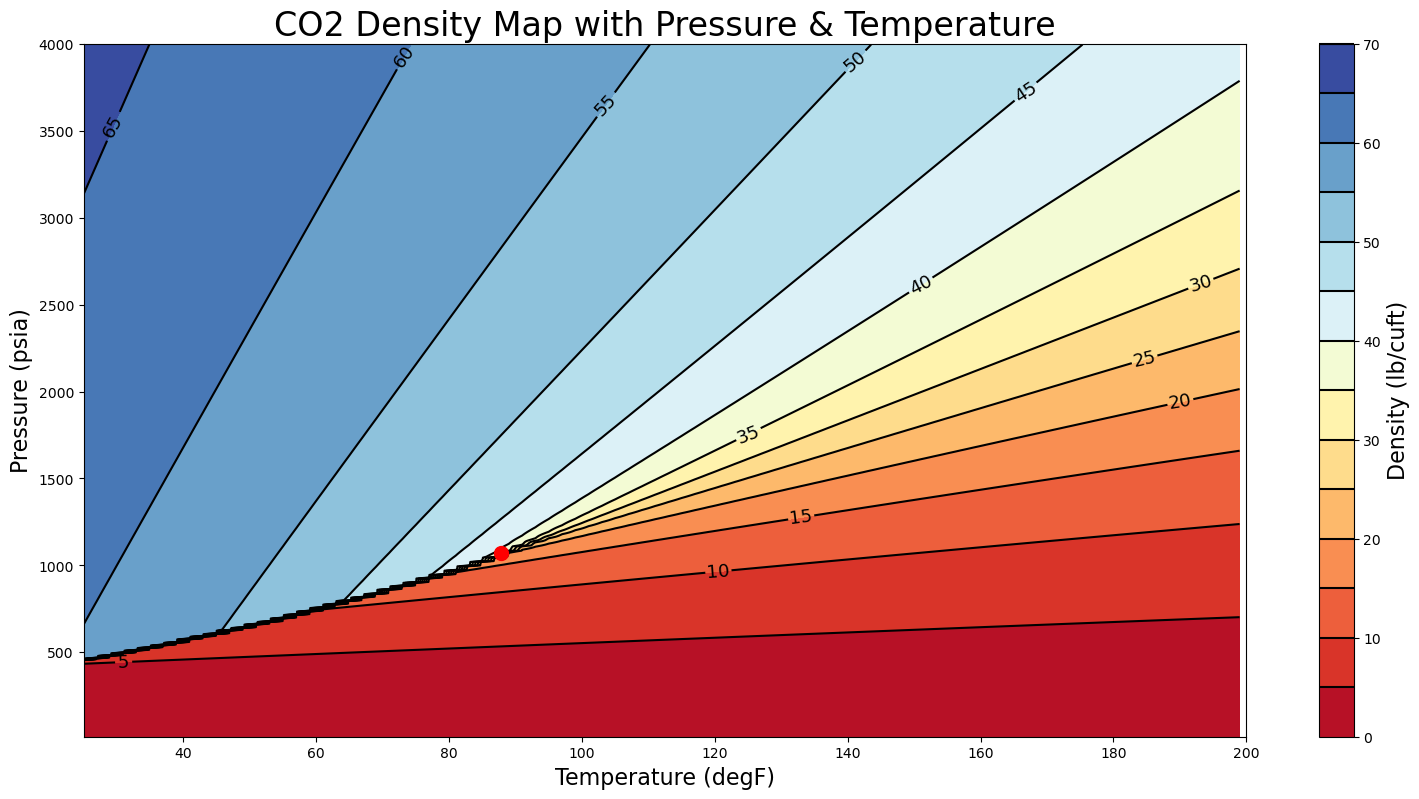

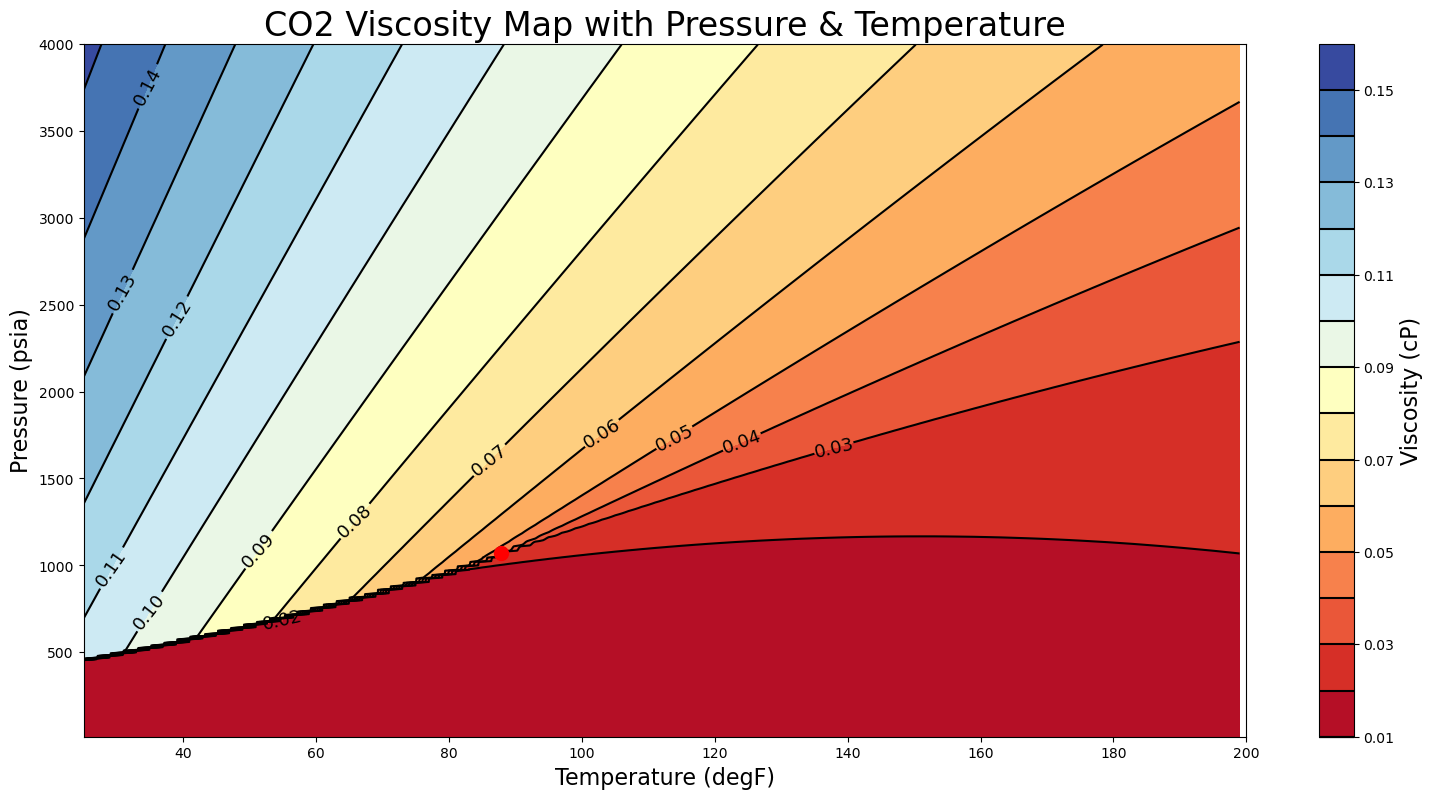

In [7]:
# Plot Density
levels = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])  # Define levels in z-axis where we want lines to appear
plot_grid(X, Y, grid_dens, levels, (25, 200), (15, 4000), 'Temperature (degF)', 'Pressure (psia)', 'Density (lb/cuft)', 'CO2 Density Map with Pressure & Temperature', png=False, reverse = True)

# Plot Viscosity
levels = np.array([x for x in range(16)])/100  # Define levels in z-axis where we want lines to appear
plot_grid(X, Y, grid_vis, levels, (25, 200), (15, 4000), 'Temperature (degF)', 'Pressure (psia)',  'Viscosity (cP)', 'CO2 Viscosity Map with Pressure & Temperature', png=False, reverse = True)

## And with alternate colour scheme, with anotations

In [8]:
pcrit, tcrit, zcrit = 1070.4, 87.76, 0.27433
den_crit = pcrit * 44.01 / (zcrit * 10.7316 * (459.67 + tcrit))

def satp(degf):
    a = [2.79565E-11,4.14338E-10,-5.83136E-08,8.25699E-05,0.031904075,5.140738371,305.6732077]
    return sum([a[i]*degf**(len(a)-1-i) for i in range(len(a))])

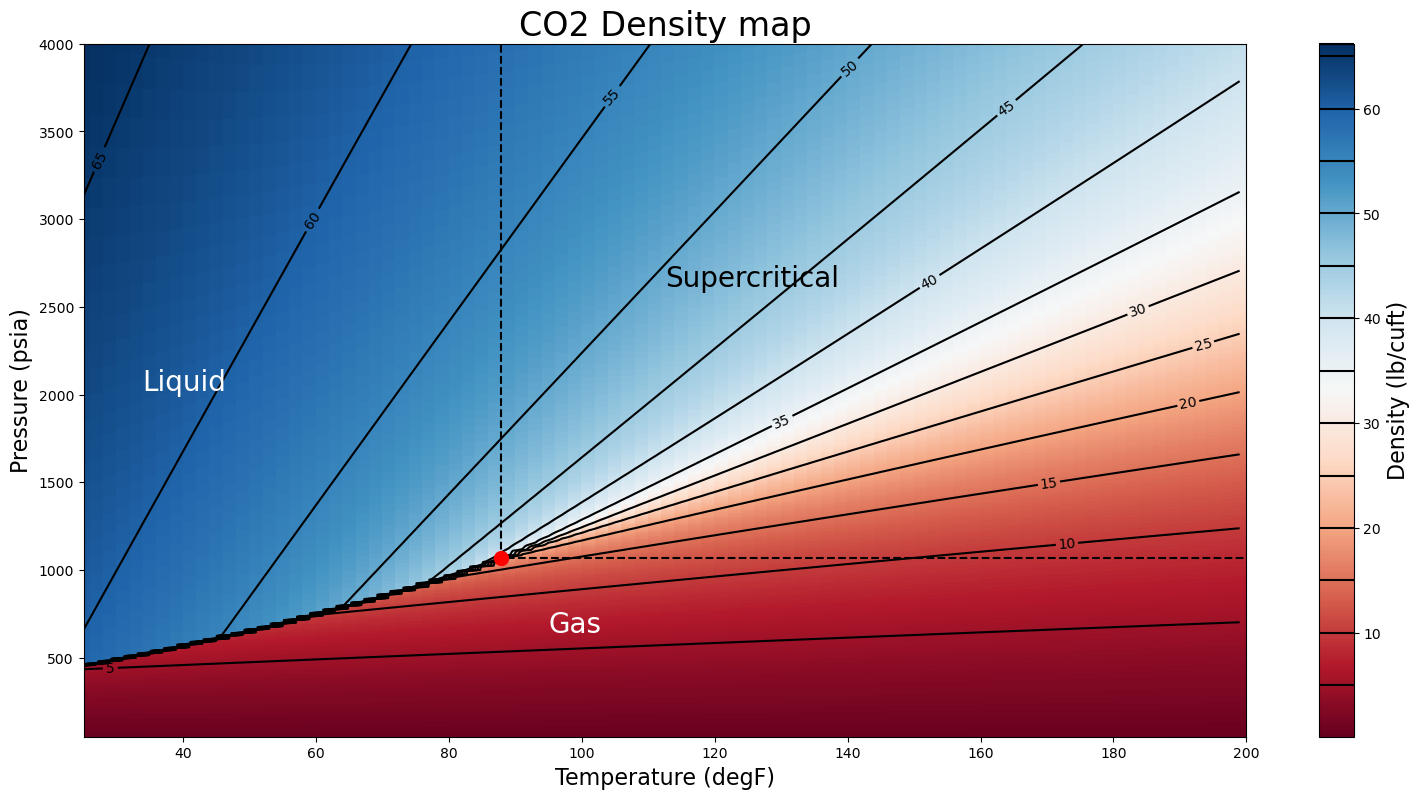

In [9]:
rcParams['figure.figsize'] = 18.75, 9 # sets plot size
fig, ax = plt.subplots()
p = ax.pcolor(X, Y, grid_dens, cmap=matplotlib.cm.RdBu, vmin=abs(grid_dens).min(), vmax=abs(grid_dens).max())
#cb = fig.colorbar(p, ax=ax)

# Define levels in z-axis where we want lines to appear
levels = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])
line_colors = ['black' for l in levels]                          # Set all level lines to black
cp = ax.contour(X, Y, grid_dens, levels=levels, colors=line_colors)  # Plot contours

ax.set_xlim(25, 200)
ax.set_ylim(50, 4000)
ax.set_ylabel('Pressure (psia)', fontsize=16)
ax.set_xlabel('Temperature (degF)', fontsize=16)
ax.clabel(cp, fontsize=10, colors=line_colors)

# Make a colorbar for the ContourSet returned by the contour call.
cbar = fig.colorbar(p)
cbar.ax.set_ylabel('Density (lb/cuft)', fontsize=16)
# Add the contour line levels to the colorbar
cbar.add_lines(cp)
#cbar.clabel(cp, fontsize=13, colors=line_colors)

ax.set_title('CO2 Density map', fontsize=24)

tsats = np.linspace(20, tcrit, 50)
psats = satp(tsats)

ax.plot(tsats, psats, '-', c='k')
ax.plot([300, tcrit, tcrit], [pcrit, pcrit, 15000], '--', c='k')
ax.plot([tcrit], [pcrit], 'o', c='r' , markersize=10)

plt.text(0.5, 0.65, 'Supercritical', transform = ax.transAxes, fontsize=20)
plt.text(0.4, 0.15, 'Gas', transform = ax.transAxes, fontsize=20, c='white')
plt.text(0.05, 0.5, 'Liquid', transform = ax.transAxes, fontsize=20, c='white')

#fig.savefig('Calculated_CO2_Density_no_contours.png', dpi=1200)